## 서포트 벡터 머신 

In [7]:
import sys 
assert sys.version_info >= (3,5)

import sklearn
import numpy as np
import os

#노트북 실험결과 동일성 유지
np.random.seed(42)

import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

### 라지 마진 분류

In [5]:
from sklearn.svm import SVC
from sklearn import datasets #붓꽃

iris = datasets.load_iris()
X = iris["data"][:, (2,3)] #꽃잎길이, 꽃잎 너비
y = iris['target']

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

#svm 분류모델
svm_clf = SVC(kernel = "linear", C=float("inf"))
svm_clf.fit(X,y)


SVC(C=inf, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

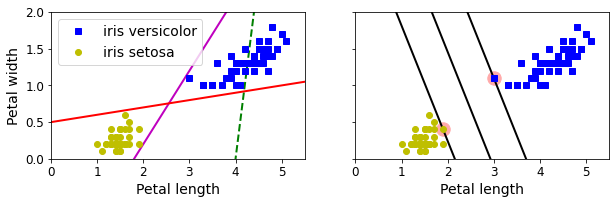

In [10]:
#라지마진분류 나쁜 모델
x0 = np.linspace(0, 5.5, 200)
pred_1 = 5*x0 - 20
pred_2 = x0 - 1.8
pred_3 = 0.1 * x0 + 0.5

def plot_svc_decision_boundary(svm_clf, xmin, xmax):
  w = svm_clf.coef_[0]
  b = svm_clf.intercept_[0]
  # 결정 경계에서 w0*x0 + w1*x1 + b = 0 이므로
  # => x1 = -w0/w1 * x0 - b/w1
  x0 = np.linspace(xmin, xmax, 200)
  decision_boundary = -w[0]/w[1] * x0 - b/w[1]

  margin = 1/w[1]
  gutter_up = decision_boundary + margin
  gutter_down = decision_boundary - margin

  svs = svm_clf.support_vectors_
  plt.scatter(svs[:, 0], svs[:, 1], s= 180, facecolors = '#FFAAAA')
  plt.plot(x0, decision_boundary, "k-", linewidth=2)
  plt.plot(x0, gutter_up, "k-", linewidth = 2)
  plt.plot(x0, gutter_down, "k-", linewidth = 2)

fig, axes = plt.subplots(ncols=2, figsize=(10,2.7), sharey=True)

plt.sca(axes[0])
plt.plot(x0, pred_1, "g--", linewidth = 2)
plt.plot(x0, pred_2, "m-", linewidth = 2)
plt.plot(x0, pred_3, "r-", linewidth = 2)
plt.plot(X[:,0][y==1], X[:, 1][y==1], "bs", label = "iris versicolor")
plt.plot(X[:,0][y==0], X[:, 1][y==0], "yo", label = "iris setosa")
plt.xlabel("Petal length", fontsize = 14)
plt.ylabel("Petal width", fontsize = 14)
plt.legend(loc = "upper left", fontsize = 14)
plt.axis([0, 5.5, 0,2])

plt.sca(axes[1])
plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X[:,0][y==1], X[:, 1][y==1], "bs")
plt.plot(X[:,0][y==0], X[:, 1][y==0], "yo")
plt.xlabel("Petal length", fontsize = 14)
plt.axis([0, 5.5, 0, 2])

plt.show()

In [ ]:
B

In [ ]:
B

In [ ]:
B

In [ ]:
B